In [1]:
from __future__ import print_function
import time

import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

In [2]:
df1 = pd.read_csv("Post_ComBat_Human_Mouse_Gene_Expression.csv", index_col="Sample", low_memory=False).T
df2 = pd.read_excel("Optimized_32_Gene_BRCA_Signature.xlsx", sheet_name=1, index_col="Hugo_Symbol")
#df1 = df1[df1.index.str.contains("MB")]
df1 = df1[~df1.Subtype.str.contains("NC")]
df1 = df1.iloc[::-1]
species = df1.pop("Subtype")
df1 = df1.astype('float64')
df1 = df1.T
df = pd.merge(df1, df2, how='inner', left_on='Sample', right_index=True)
df = df.T


#species = reversed(species)
#species = df.pop("CLAUDIN_SUBTYPE")
#lut = dict(zip(species.unique(), [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]))
#inv_lut = {v: k for k, v in lut.items()}
#species.unique()
#numbers = species.map(lut)


X = df.values
y = np.array(numbers)
species

NameError: name 'numbers' is not defined

In [3]:
time_start = time.time()

tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, n_jobs=-1, random_state=1)
tsne_results = tsne.fit_transform(X)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 12.236995458602905 seconds


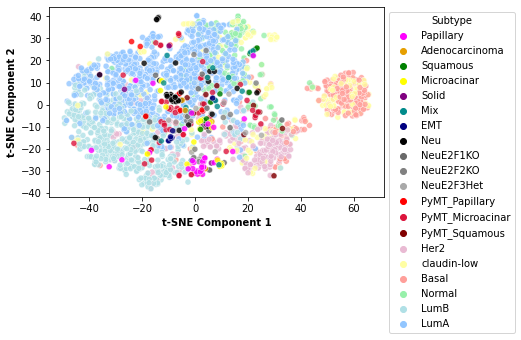

In [10]:
df['tsne-1d'] = tsne_results[:,0]
df['tsne-2d'] = tsne_results[:,1]
#df['tsne-3d'] = tsne_results[:,2]
#df['tsne-2d-one'] = df['tsne-2d-one']
#df['tsne-2d-two'] = df['tsne-2d-two']

plt.figure(figsize=(6,3.5))
sns.scatterplot(
    x="tsne-1d", y="tsne-2d",
    hue=species,
    #palette=['blue','pink','yellow','red','cyan','green',],
    #palette=sns.color_palette("husl", 18),
    #palette=reversed(['green','cyan','red','yellow','pink','blue','orange','grey','grey','grey',
             #'black','black','black','black','black','black','black','grey']),
    palette=['#92c6ff','#b0e0e6','#97f0aa','#ff9f9a','#fffea3','#E9BAD3','maroon','crimson','red','darkgray','gray','dimgray',
             'k','navy','darkcyan','purple','yellow','green','#E69F00','magenta'],
    #palette=sns.diverging_palette(h_neg=145, h_pos=300, l=50, s=60, n=18, sep=10, center='light'),
    #palette=['#92c6ff','#b0e0e6','#97f0aa','#ff9f9a','#fffea3','#E9BAD3','blue','darkgray','gray','dimgray',
             #'k','red','red','red','red','red','red','red'],
    data=df,
    legend='full',
    alpha=0.8)

plt.xlabel("t-SNE Component 1", fontweight='bold')
plt.ylabel("t-SNE Component 2", fontweight='bold')

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Subtype', loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.savefig("tSNE_Metabric_32_gene.svg", dpi=1200)

In [184]:
import plotly.express as px
#df = px.data.iris()
fig = px.scatter_3d(df, x='tsne-1d', y='tsne-2d', z='tsne-3d',
              color=species, opacity=0.5)
fig.show()